In [1]:
import sys; sys.path.append('..')
from bias import *
import nltk,random

In [2]:
fndir='/Users/ryan/lltk_data/corpora/coha/txt/1990s'

In [3]:
words=[]
fns=os.listdir(fndir)
fns=random.sample(fns,100)
for fn in tqdm(fns):
    if fn.endswith('.txt'):
        with open(os.path.join(fndir,fn)) as f: txt = f.read()
        words += nltk.word_tokenize(txt)
len(words)

100%|██████████| 100/100 [00:00<00:00, 101.08it/s]


344403

In [4]:
text = nltk.Text(words)
text.concordance('man')

Displaying 25 of 356 matches:
en born . For Sir Alvord was a gentle man , silent in company , devoted to soli
nounced nose that made him a handsome man kept her from being considered anythi
ving blood relation - and I am an old man . `` Somewhat distressed by this gree
ng , a difficulty not remarkable in a man who all his life had been accustomed 
s was not at home to visitors . `` `` Man was n't dead yet , `` said Mr. Mildma
wife , Caroline . A wife is part of a man 's family , I hope . `` `` Not when s
 her husband 's property into another man 's family . `` `` Then we must hope t
ed behind the boot-rack . `` The poor man looked so close to tears that Mrs. Mi
`` waldoes `` - after the name of the man who invented them in his story . Now 
Some years ago I wrote a novel called Man Plus , which was about an astronaut w
singing about something that happen , man , is something that happening singing
nd thought out in poetry . But this , man , this happening to you right now , m
n , this h

In [164]:
def most_similar(m,word,topn=25): return pd.Series(dict(m.most_similar(word,topn=topn)))

In [168]:
m = load_model('/Users/ryan/DH/data/models/coha/1975-2000/run_08/model.bin')

In [241]:
most_similar(m, 'nurse')

doctor          0.780738
intern          0.681867
gynecologist    0.681157
hospital        0.675986
patient         0.675175
practitioner    0.672435
physician       0.668749
nurses          0.668071
surgeon         0.660030
pediatrician    0.656693
deller          0.651863
keloid          0.651589
icu             0.644895
nuala           0.644115
comatose        0.642887
psychiatrist    0.642885
debbie          0.635713
obstetrician    0.634100
nahum           0.633708
checkup         0.632586
clinic          0.630396
girl            0.625748
counselor       0.623674
midwife         0.623087
maid            0.618695
dtype: float64

In [242]:
most_similar(m, 'doctor')

patient         0.781459
nurse           0.780738
physician       0.755015
psychiatrist    0.719401
neurologist     0.702746
surgeon         0.699983
gynecologist    0.698801
cardiologist    0.697830
checkup         0.696962
obstetrician    0.692658
dr.             0.659568
vet             0.650282
nahum           0.646088
medication      0.646048
biopsy          0.644263
prostate        0.639859
veterinarian    0.639561
keloid          0.639082
clinic          0.635929
devries         0.635908
diabetic        0.634885
pediatrician    0.634601
mayo            0.634597
pathologist     0.629698
pediatric       0.628112
dtype: float64

In [218]:
', '.join(set(mn.index) - set(wn.index))

'dr., veterinarian, devries, nurse, diabetic, vet, medication, pathologist, cardiologist, prostate, biopsy, mayo, pediatric, neurologist'

In [219]:
', '.join(set(wn.index) - set(mn.index))

'hospital, nuala, deller, intern, midwife, maid, debbie, comatose, counselor, icu, nurses, girl, practitioner, doctor'

In [207]:
# ', '.join(set(wn.index) & set(mn.index))

In [153]:
# topneighbs = [w for w,c in m.most_similar('woman',topn=50)] + [w for w,c in m.most_similar('man',topn=50)]
# topneighbs = sorted(list(set(topneighbs)))
# topneighbs_vecs = [m[w] for w in topneighbs]

In [237]:
n=25
tnld = [dict(word=w, cos=c, rank=i, focus="C-Neighbor of 'woman'") for i,(w,c) in enumerate(m.most_similar('woman',topn=n))]
tnld+= [dict(word=w, cos=c, rank=i, focus="A-Neighbor of 'man'") for i,(w,c) in enumerate(m.most_similar('man',topn=n))]
tnld+= [dict(word=w, cos=c, rank=i, focus="B-Neighbor of 'nurse'") for i,(w,c) in enumerate(m.most_similar('nurse',topn=n))]
tnld+= [dict(word=w, cos=c, rank=i, focus="D-Neighbor of 'doctor'") for i,(w,c) in enumerate(m.most_similar('doctor',topn=n))]
# tnld+= [dict(word=w, cos=c, rank=i, focus="Man-Woman") for i,(w,c) in enumerate(m.most_similar(['man'],['woman'],topn=n))]
# tnld+= [dict(word=w, cos=c, rank=i, focus="D-Neighbor of 'cat'") for i,(w,c) in enumerate(m.most_similar('cat',topn=n))]
# tnld+= [dict(word=w, cos=c, rank=i, focus="Woman-Man") for i,(w,c) in enumerate(m.most_similar(['woman'],['man'],topn=n))]
tndf = pd.DataFrame(tnld)
# s=tndf.word.value_counts()
# in_both = set(s[s>1].index)
# tndf.loc[tndf.word.isin(in_both), 'focus'] = "B-Neighbor of all"
tndf=tndf.drop_duplicates('word')
tndf

,word,cos,rank,focus
0,man,0.843232,0,C-Neighbor of 'woman'
1,girl,0.822820,1,C-Neighbor of 'woman'
2,lady,0.726481,2,C-Neighbor of 'woman'
3,person,0.712783,3,C-Neighbor of 'woman'
4,teenager,0.705833,4,C-Neighbor of 'woman'
...,...,...,...,...
94,devries,0.635908,19,D-Neighbor of 'doctor'
95,diabetic,0.634885,20,D-Neighbor of 'doctor'
97,mayo,0.634597,22,D-Neighbor of 'doctor'
98,pathologist,0.629698,23,D-Neighbor of 'doctor'


In [238]:
# topneighbs+=['woman-man']
# topneighbs_vecs+=[m['woman']-m['man']]
# topneighbs+=['man-woman']
# topneighbs_vecs+=[m['man']-m['woman']]

In [239]:
vecs = [m[w] for w in tndf.word]
words=list(tndf.word)
# words+=['woman-man','man-woman']
# vecs+=[m['woman']-m['man']]
# vecs+=[m['man']-m['woman']]

vecs_tsne = TSNE(n_components=2).fit_transform(vecs)
Xedf=pd.DataFrame(vecs_tsne, columns=['tsne1', 'tsne2']).assign(word=words)
Xtndf=tndf.merge(Xedf,on='word',how='outer')
# Xtndf.loc[Xtndf.word=="woman-man", 'focus']="Woman-Man"
# Xtndf.loc[Xtndf.word=="man-woman", 'focus']="Man-Woman"
Xtndf

,word,cos,rank,focus,tsne1,tsne2
0,man,0.843232,0,C-Neighbor of 'woman',-3.249403,3.300620
1,girl,0.822820,1,C-Neighbor of 'woman',-4.348441,2.820009
2,lady,0.726481,2,C-Neighbor of 'woman',-3.654186,1.887697
3,person,0.712783,3,C-Neighbor of 'woman',-4.826084,2.083223
4,teenager,0.705833,4,C-Neighbor of 'woman',-4.069221,2.678518
...,...,...,...,...,...,...
74,devries,0.635908,19,D-Neighbor of 'doctor',-0.665147,-2.221427
75,diabetic,0.634885,20,D-Neighbor of 'doctor',0.949907,-1.627047
76,mayo,0.634597,22,D-Neighbor of 'doctor',-1.416061,-2.554492
77,pathologist,0.629698,23,D-Neighbor of 'doctor',-0.492504,-2.269593


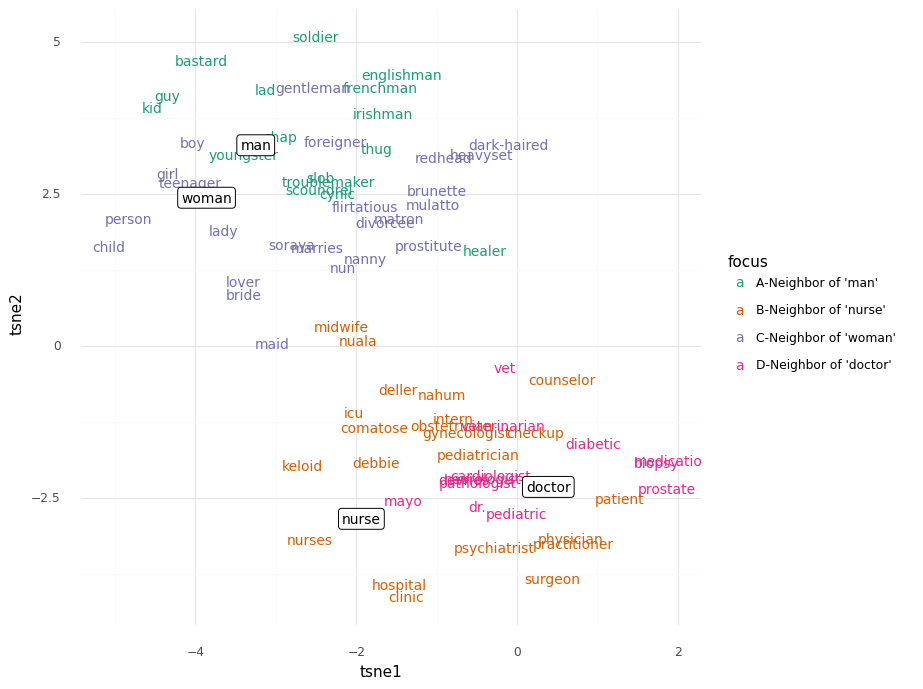

<ggplot: (707044121)>

In [240]:
p9.options.figure_size=8,8
fig=p9.ggplot(p9.aes(x='tsne1', y='tsne2', label='word', color='focus'), data=Xtndf)
fig+=p9.geom_text(size=10)
fig+=p9.geom_label(size=10, data=Xtndf[Xtndf.word.isin({'man','woman','woman-man','man-woman','nurse','doctor'})], color='black')
fig+=p9.scale_color_brewer(type='qual',palette=2)
fig+=p9.theme_minimal()
fig

In [257]:
m.similarity('woman','man')

0.8432319

In [266]:
m.similarity('nurse','woman')

0.6116417

In [267]:
m.similarity('nurse','man')

0.4687695

In [263]:
m.similarity('doctor','man')

0.4992569

In [264]:
m.similarity('doctor','woman')

0.51259255

In [251]:
m.similarity('man','doctor')

0.4992569

In [253]:
m.similarity('man','nurse')

0.4687695

In [255]:
m.similarity('woman','nurse')

0.6116417

In [256]:
m.similarity('woman','doctor')

0.51259255